# Comparing PyR0 and BVAS Growth Rates to Infectivity and Neutralization Over Time

In [31]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load in data

In [24]:
pyrofile = '../data/processed/PyR0_Ranked_Mutations.tsv'
pyro = pd.read_csv(pyrofile, sep='\t').rename(columns={'mutation':'Mutation'})
pyro['Gene'] = pyro['Mutation'].apply(lambda x: x.split(':')[0])
pyro['Mutation'] = pyro['Mutation'].apply(lambda x: x.split(':')[1])
print('PyR0: {:,.0f} rows'.format(len(pyro)))
# pyro.head()

PyR0: 156,890 rows


In [15]:
bvasfile = '../data/processed/BVAS_Ranked_Mutations.tsv'
bvas = pd.read_csv(bvasfile, sep='\t').rename(columns={'Unnamed: 0':'Mutation'})
bvas['Gene'] = bvas['Mutation'].apply(lambda x: x.split(':')[0])
bvas['Mutation'] = bvas['Mutation'].apply(lambda x: x.split(':')[1])
print('BVAS: {:,.0f} rows'.format(len(bvas)))
# bvas.head()

BVAS: 128,212 rows


In [16]:
infectivityfile = '../data/processed/infectivity_mutation_effects.csv'
infectivity = pd.read_csv(infectivityfile).rename(columns={'Effect':'Log10 Infectivity'})
print('Infectivity: {:,.0f} rows'.format(len(infectivity)))
# infectivity.head()

Infectivity: 141 rows


In [17]:
neufile = '../data/processed/neutralization_mutation_effects_across_pools.csv'
neu = pd.read_csv(neufile).rename(columns={'Mean Effect':'Log10 Mean Neutralization'})
print('Neutralization avg across pools: {:,.0f} rows'.format(len(neu)))
# neu.head()

Neutralization avg across pools: 110 rows


In [18]:
neupfile = '../data/processed/neutralization_mutation_effects_within_pools.csv'
neup = pd.read_csv(neupfile).rename(columns={'Mean Effect':'Log10 Pool Neutralization'})
print('Neutralization within pools: {:,.0f} rows'.format(len(neup)))
# neup.head()

Neutralization within pools: 1,210 rows


---
## Check relationships in our most recent data

In [58]:
subset_pyro = pyro[pyro['Run date']=='2023-03-20']
subset_pyro = subset_pyro[subset_pyro['Gene']=='S'][['Mutation', 'Δ log R', 'R / R_A']]
subset_pyro

,Mutation,Δ log R,R / R_A
83789,F486P,0.158265,1.171480
83791,L452Q,0.072066,1.074730
83792,R346K,0.085888,1.089680
83793,S704L,0.059571,1.061380
83794,L452R,0.107022,1.112960
...,...,...,...
86967,S371L,-0.007365,0.992662
86970,G339D,-0.005280,0.994734
86975,G496S,-0.018300,0.981866
86977,F486S,-0.030039,0.970408


<AxesSubplot: xlabel='Log10 Mean Neutralization', ylabel='R / R_A'>

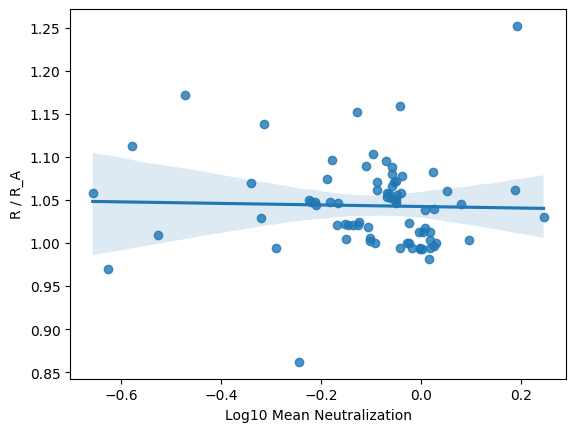

In [59]:
df = pd.merge(subset_pyro, neu, on='Mutation')

fig, ax = plt.subplots()
sns.regplot(x='Log10 Mean Neutralization',
            y='R / R_A',
            data = df,
            ax=ax)

<AxesSubplot: xlabel='Log10 Infectivity', ylabel='R / R_A'>

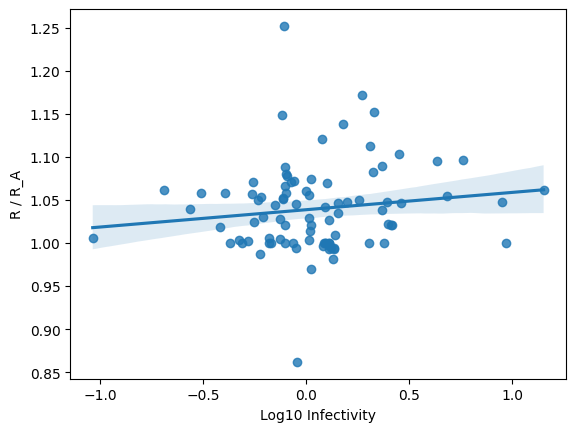

In [60]:
df = pd.merge(subset_pyro, infectivity, on='Mutation')

fig, ax = plt.subplots()
sns.regplot(x='Log10 Infectivity',
            y='R / R_A',
            data = df,
            ax=ax)

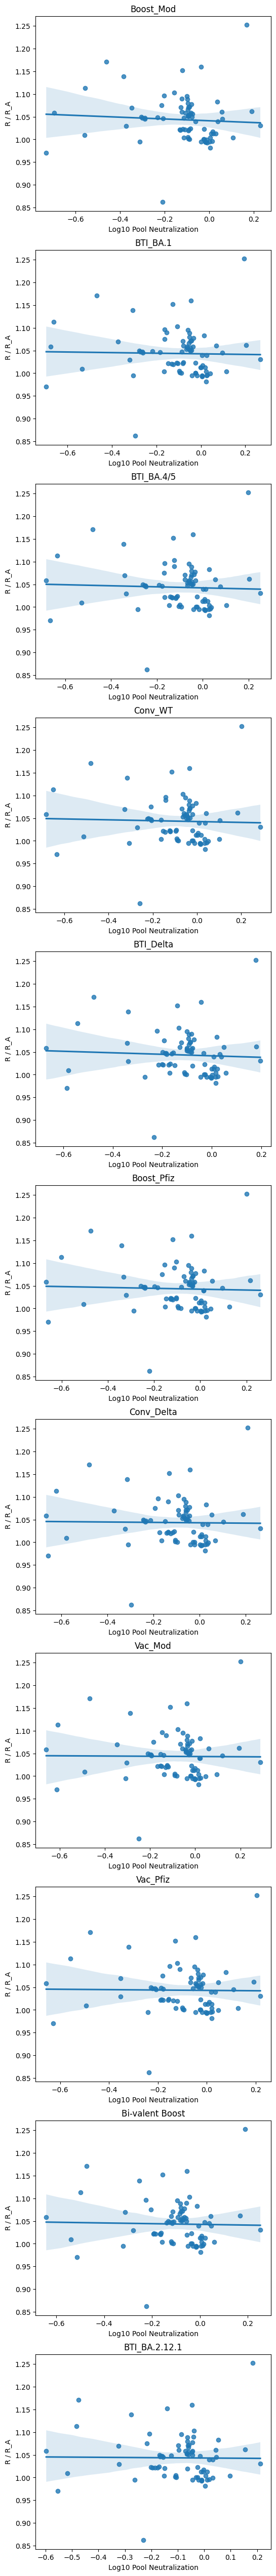

In [61]:
fig, axes = plt.subplots(11, 1, figsize=(6, 65))
for ax, pool in zip(axes, neup['Pool'].unique()):
    subset_neup = neup[neup['Pool']==pool]
    df = pd.merge(subset_pyro, subset_neup, on='Mutation')
    sns.regplot(x='Log10 Pool Neutralization',
                y='R / R_A',
                data=df,
                ax=ax);
    ax.set_title(pool)